In [1]:
#analisis kasus covid19 di indonesia khususnya di Jawa Barat
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import calendar

In [2]:
response = requests.get('https://data.covid19.go.id/public/api/update.json')
print(response.headers)

{'Server': 'nginx', 'Date': 'Mon, 22 Mar 2021 22:41:13 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 22 Mar 2021 22:40:41 GMT', 'ETag': 'W/"60591ce9-24432"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [3]:
cov_id_raw = response.json()

In [4]:
print(cov_id_raw.keys())

dict_keys(['data', 'update'])


In [5]:
cov_id_update = cov_id_raw['update']
print(cov_id_raw.keys())

dict_keys(['data', 'update'])


In [6]:
print('tanggal pembaharuan covid di Indonesia', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh: ', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal: ', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif: ', cov_id_update['total']['jumlah_positif'])
print('jumlah total kasus meninggal: ', cov_id_update['total']['jumlah_meninggal'])

tanggal pembaharuan covid di Indonesia 2021-03-22
Jumlah penambahan kasus sembuh:  7177
Jumlah penambahan kasus meninggal:  161
Jumlah total kasus positif:  1465928
jumlah total kasus meninggal:  39711


In [7]:
#kasus covid-19 di Jawa Barat
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [8]:
cov_jabar_raw.keys()

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

In [9]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 238613
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.197755.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 85.863721.2%


In [10]:
print(cov_jabar_raw['last_date'])

2021-03-19


In [11]:
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       383 non-null    int64
 1   KASUS                         383 non-null    int64
 2   MENINGGAL                     383 non-null    int64
 3   SEMBUH                        383 non-null    int64
 4   DIRAWAT_OR_ISOLASI            383 non-null    int64
 5   AKUMULASI_KASUS               383 non-null    int64
 6   AKUMULASI_SEMBUH              383 non-null    int64
 7   AKUMULASI_MENINGGAL           383 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  383 non-null    int64
dtypes: int64(9)
memory usage: 27.1 KB
info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0   

In [12]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())
print('Lima data terbawah:\n', cov_jabar_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0
Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
378 2021-03-15        1334         18    1130
379 2021-03-16        1617         32    1934
380 2021-03-17        1347         36    3472
381 2021-03-18        1261         44     918
382 2021-03-19        1361          5      84


<Figure size 432x288 with 0 Axes>

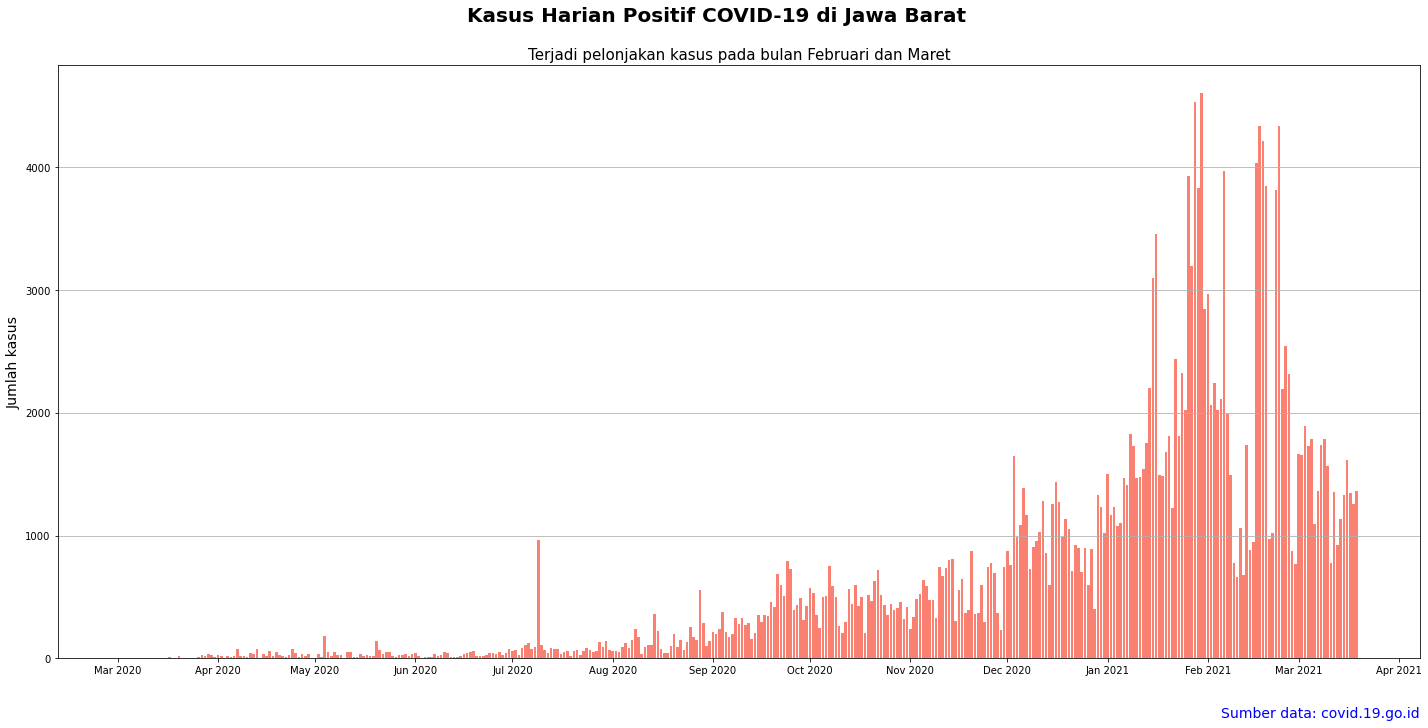

In [13]:
#grafik kasus positif harian (sampai 19 Maret 2021)
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=20, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus pada bulan Februari dan Maret',
             fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=14)
ax.text(1, -0.100, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

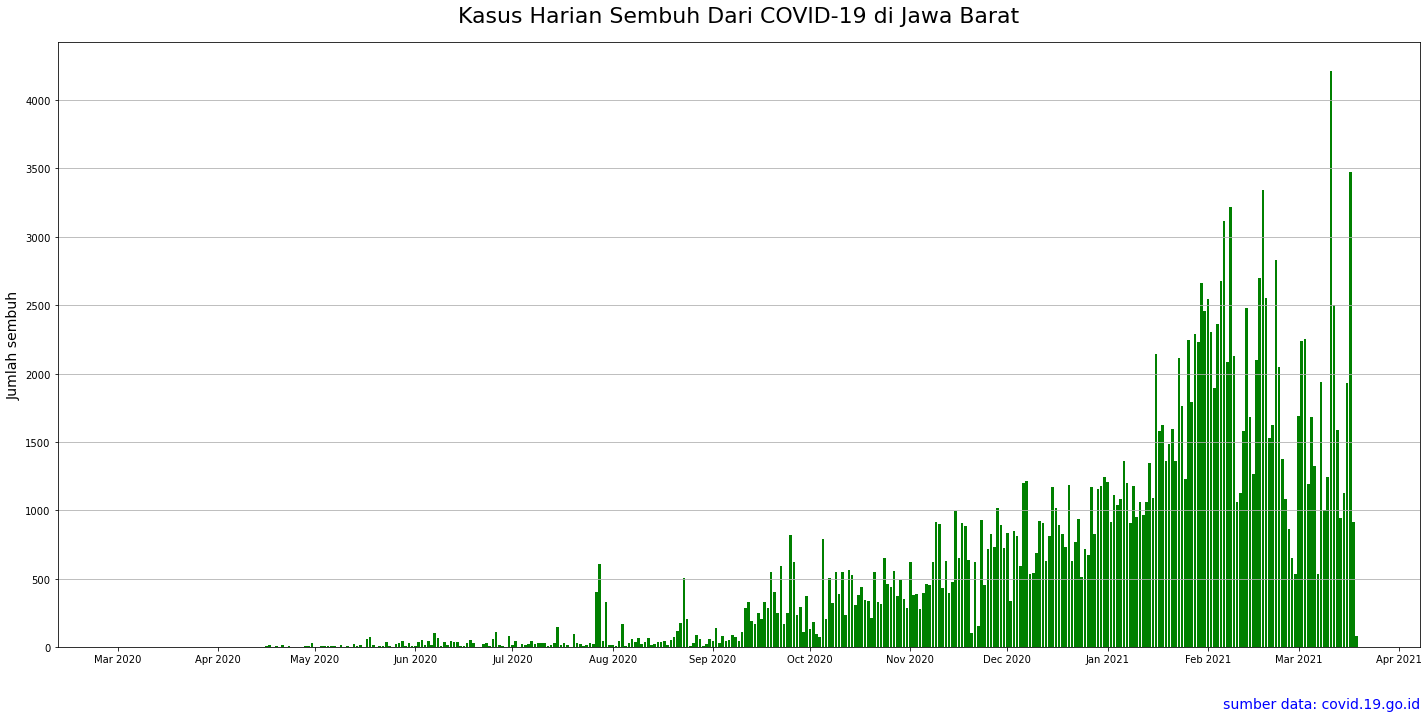

In [14]:
#grafik kasus sembuh harian (sampai 19 Maret 2021)
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='green')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Jumlah sembuh', fontsize=14)
ax.text(1, -0.1, 'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

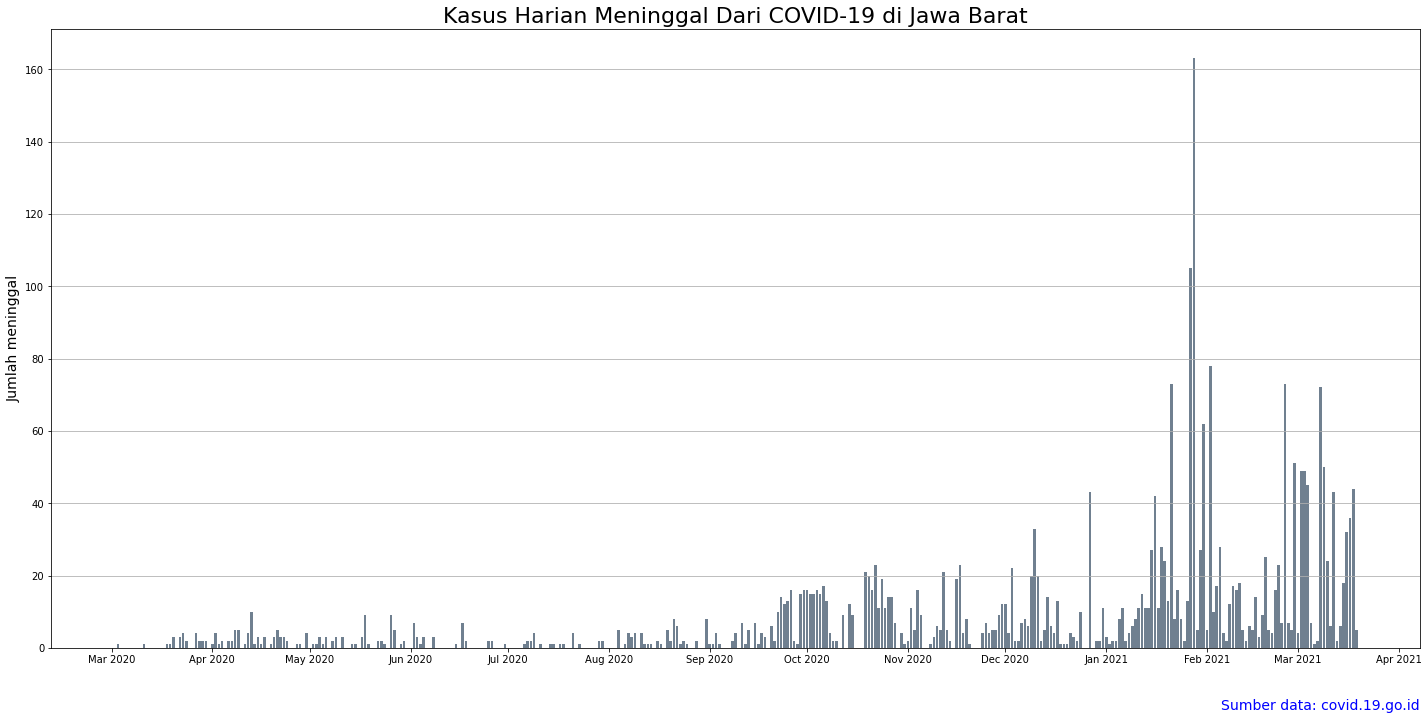

In [15]:
#grafik kasus meninggal (sampai 19 Maret 2021)
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategray')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah meninggal', fontsize=14)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
#menghitung akumulasi kasus aktif,sembuh, dan meninggal COVID-19 di Jawa Barat
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['meninggal'] - cov_jabar_tidy['sembuh']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
378,2021-03-15,32864,197421,2733
379,2021-03-16,32515,199355,2765
380,2021-03-17,30354,202827,2801
381,2021-03-18,30653,203745,2845
382,2021-03-19,31925,203829,2850


<Figure size 432x288 with 0 Axes>

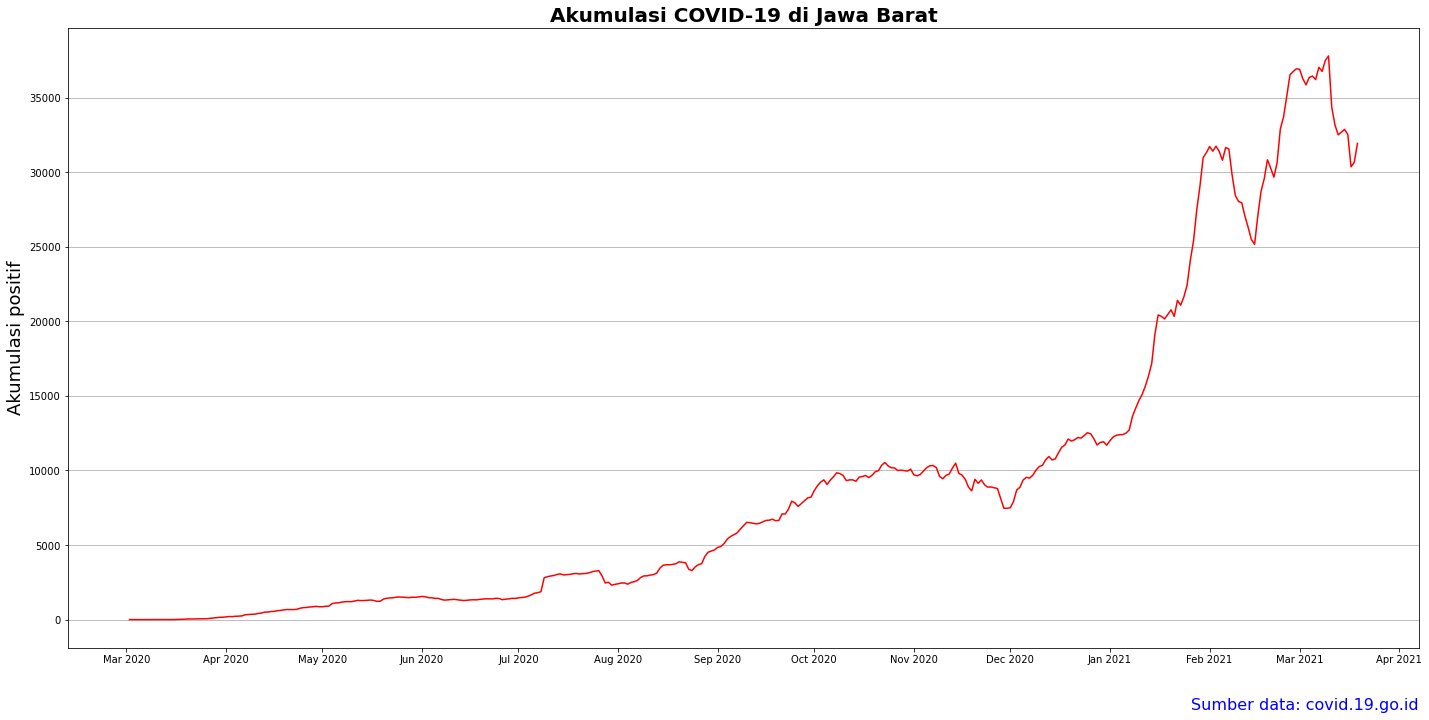

In [17]:
#membuat line-grafik akumulasi kenaikan kasus aktif COVID-19 di Jawa Barat
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi,color='red')
ax.set_title('Akumulasi COVID-19 di Jawa Barat', fontsize=20, y=1.00, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Akumulasi positif', fontsize=18)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes, fontsize=16)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

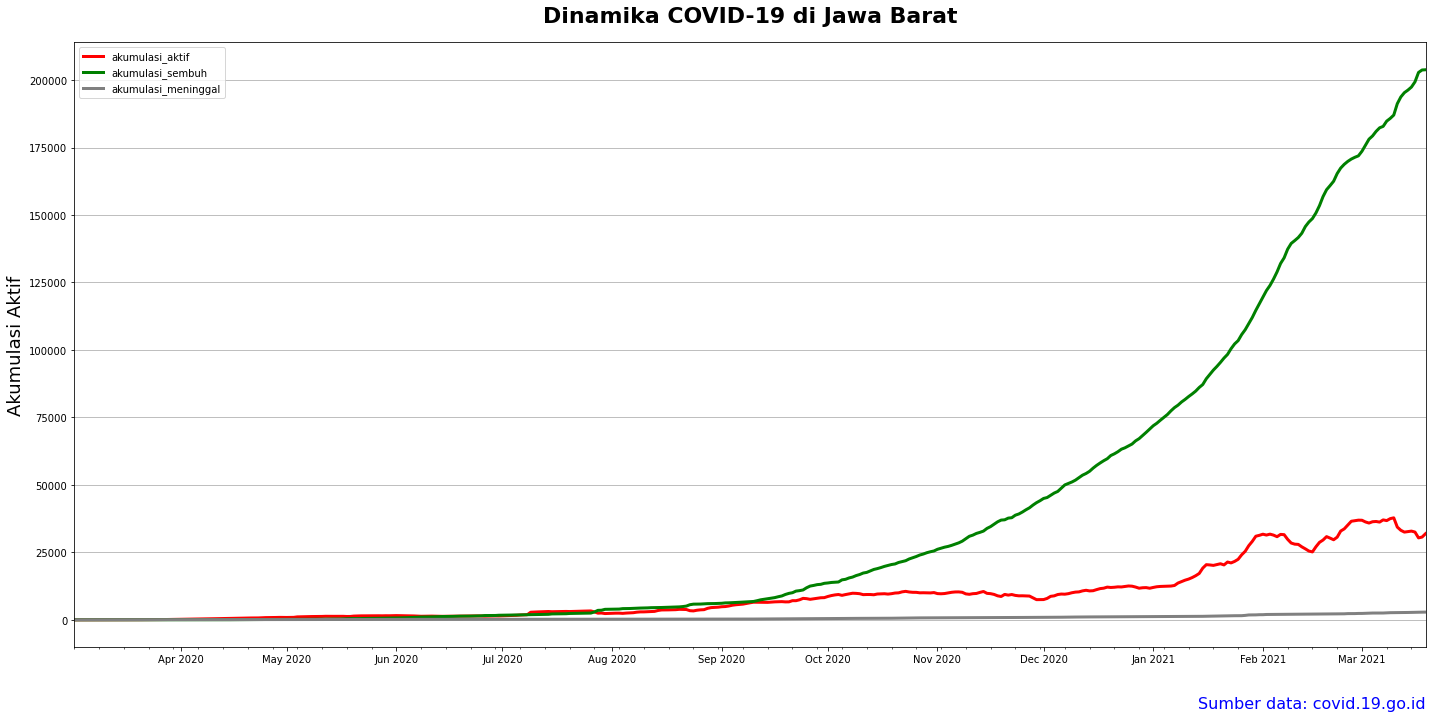

In [18]:
# membandingkan akumulasi kasus positif, sembuh dan meninggal selama tahun 2020 - 2021
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['red', 'green', 'gray'])
ax.set_title('Dinamika COVID-19 di Jawa Barat', fontsize=22, y=1.00, fontweight='bold', ha='center', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif', fontsize=18)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes, fontsize=16)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()